# Figures & Tables
for the AGENT historical **wheat** (and spelt) data paper  

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load all sorts of data

In [2]:
all_rows <- list.files(recursive=TRUE, pattern="(wheat|spelt)\\.csv$") |>
    set_names(basename) |>
    map(read_csv, show_col_types=FALSE) |>
    map(mutate, across(c(accenumb, doi), ~ as.character(.x))) |>
    list_rbind(names_to = "dataset") |>
    mutate(dataset = gsub(".csv", "", dataset))

In [3]:
data_points <- all_rows |> select(-c(agent_id, doi, name, description)) |> 
    pivot_longer(cols = -c(dataset, accenumb, campaign), names_to = "trait") |>
    drop_na() |>
    arrange(campaign, accenumb, trait)
glimpse(data_points)

Rows: 460,399
Columns: 5
$ dataset  <chr> "Agroscope_spelt", "Agroscope_spelt", "Agroscope_spelt", "Agr…
$ accenumb <chr> "TS0073", "TS0073", "TS0073", "TS0074", "TS0074", "TS0074", "…
$ campaign <chr> "1937-1938", "1937-1938", "1937-1938", "1937-1938", "1937-193…
$ trait    <chr> "date_of_flowering", "days_to_flowering", "stem_length", "dat…
$ value    <dbl> 19380620, 170, 150, 19380620, 170, 155, 19380620, 170, 155, 1…


In [4]:
data_points_corrected <- list.files(recursive=TRUE, pattern="(wheat|spelt)_corrected\\.csv$") |>
    set_names(basename) |>
    map(read_csv, show_col_types=FALSE) |>
    map(mutate, accenumb = as.character(accenumb)) |>
    list_rbind(names_to = "dataset") |>
    mutate(dataset = gsub("_corrected.csv", "", dataset))
glimpse(data_points_corrected)

Rows: 212,276
Columns: 5
$ dataset  <chr> "CREA_wheat", "CREA_wheat", "CREA_wheat", "CREA_wheat", "CREA…
$ accenumb <chr> "TA00001", "TA00001", "TA00001", "TA00001", "TA00001", "TA000…
$ campaign <chr> "2005-2006", "2005-2006", "2005-2006", "2005-2006", "2005-200…
$ trait    <chr> "days_to_heading", "days_to_heading", "leaf_rust", "leaf_rust…
$ value    <dbl> 128.0, 127.0, 3.0, 1.0, 74.0, 84.0, 78.0, 80.0, 66.0, 3.0, 5.…


In [5]:
data_quality <- list.files(recursive=TRUE, pattern="(wheat|spelt)_data_quality\\.csv$") |>
    set_names(basename) |>
    map(read_csv, show_col_types=FALSE) |>
    list_rbind(names_to = "dataset") |>
    mutate(dataset = gsub("_data_quality.csv", "", dataset))
glimpse(data_quality)

Rows: 40
Columns: 6
$ dataset      <chr> "CREA_wheat", "CREA_wheat", "CREA_wheat", "CREA_wheat", "…
$ trait        <chr> "days_to_heading", "plant_height", "thousand_kernel_weigh…
$ heritability <dbl> 0.883, 0.947, 0.872, 0.040, 0.370, 0.067, 0.756, 0.913, 0…
$ var_G        <dbl> 32.238, 425.644, 27.826, 0.073, 0.496, 0.035, 1.093, 66.2…
$ var_E        <dbl> 19.884, 119.755, 21.587, 4.424, 2.718, 1.738, 2.688, 46.8…
$ no_campaigns <dbl> 4.668, 5.013, 5.288, 2.535, 3.220, 3.572, 7.629, 7.432, 4…


In [6]:
BLUE_values <- list.files(recursive=TRUE, pattern="(wheat|spelt)_BLUE_values\\.csv$") |>
    set_names(basename) |>
    map(read_csv, show_col_types=FALSE) |>
    map(mutate, genotype = as.character(genotype)) |>
    list_rbind(names_to = "dataset") |>
    mutate(dataset = gsub("_BLUE_values.csv", "", dataset))
glimpse(BLUE_values)

Rows: 43,293
Columns: 13
$ dataset                       <chr> "CREA_wheat", "CREA_wheat", "CREA_wheat"…
$ genotype                      <chr> "TA00001", "TA00002", "TA00003", "TA0000…
$ days_to_heading_BLUE          <dbl> 126.22, 124.81, 123.82, 123.23, 123.03, …
$ plant_height_BLUE             <dbl> 67.69, 66.66, 64.05, 68.51, 97.52, 77.64…
$ thousand_kernel_weight_BLUE   <dbl> 39.33, 26.82, NA, NA, 37.58, 34.15, NA, …
$ powdery_mildew_BLUE           <dbl> 2.76, 1.17, 4.53, 1.97, 1.48, 1.17, 0.10…
$ leaf_rust_BLUE                <dbl> 2.61, 1.89, 3.66, 2.00, 3.56, 2.66, 2.74…
$ septoria_tritici_ssp_BLUE     <dbl> 3.38, 3.28, NA, 3.54, 3.10, 3.22, 3.08, …
$ protein_content_BLUE          <dbl> 13.16, 14.32, NA, NA, 14.40, 13.03, NA, …
$ sds_sedimentation_volume_BLUE <dbl> 44.75, 44.21, NA, NA, 57.05, 45.18, NA, …
$ end_of_heading_BLUE           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ plant_density_BLUE            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ dry_matter_yi

In [7]:
accessions_details <- read_csv("dataset_accessions.csv", show_col_types = FALSE)
glimpse(accessions_details)

Rows: 43,300
Columns: 10
$ accession_match   <chr> "CREA_wheat/TA00536", "CREA_wheat/TA00715", "CREA_wh…
$ responsibility    <chr> "CREA-CI", "CREA-CI", "CREA-CI", "CREA-CI", "CREA-CI…
$ instcode          <chr> "ITA383", "ITA383", "ITA383", "ITA383", "ITA383", "I…
$ crop              <chr> "Wheat", "Wheat", "Wheat", "Wheat", "Wheat", "Wheat"…
$ genus             <chr> "Triticum", "Triticum", "Triticum", "Triticum", "Tri…
$ species           <chr> "aestivum", "aestivum", "aestivum", "aestivum", "aes…
$ species_authority <chr> "L.", "L.", "L.", "L.", "L.", "L.", "L.", "L.", "L."…
$ accenumb          <chr> "TA00536", "TA00715", "TA00716", "TA00717", "TA00718…
$ declatitude       <dbl> 44.49376, 44.49376, 45.75802, 45.75802, 45.75802, 45…
$ declongitude      <dbl> 11.343031, 11.343031, 7.035433, 7.035433, 7.035433, …


## Data summary table

In [8]:
summary_raw <- data_points |>
    filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |>
    summarize(
        data_points_raw = n(),
        accessions_raw = n_distinct(accenumb),
        .by=c(dataset, trait))

summary_corrected <- data_points_corrected |> 
    filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |>
    summarize(
        data_points_corrected = n(),
        accessions_corrected = n_distinct(accenumb),
        .by=c(dataset, trait))

summary_raw |>
left_join(summary_corrected, by=c("dataset", "trait")) |>
mutate(
    data_points_kept = data_points_corrected/data_points_raw,
    accessions_kept = accessions_corrected/accessions_raw) |>
left_join(data_quality, by=c("dataset", "trait")) |> 
mutate(across(c(dataset, trait), ~ str_replace_all(.x, "_", " "))) |>
arrange(dataset, trait) |>
gt::gt(groupname_col = "dataset", rowname_col = "trait", row_group_as_column = TRUE) |>
gt::cols_move_to_end(heritability) |>
gt::fmt_percent(columns = c(data_points_kept, accessions_kept, heritability), decimals = 1) |>
gt::fmt_number(columns = c(var_G, var_E, no_campaigns), decimals = 1) |>
gt::cols_label(
    data_points_raw = "Data points (raw)",
    accessions_raw = "Accessions (raw)",
    data_points_corrected = "Data points (corrected)", 
    accessions_corrected = "Accessions (corrected)",
    data_points_kept = "Data points kept",
    accessions_kept = "Accessions kept",
    var_G = "Var. G",
    var_E = "Var. E",
    no_campaigns = "N. Campaigns",
    heritability = "Heritability"
) |>
gt::gtsave("data_summary_table.html")

## Trait values distribution

Saving 7 x 7 in image


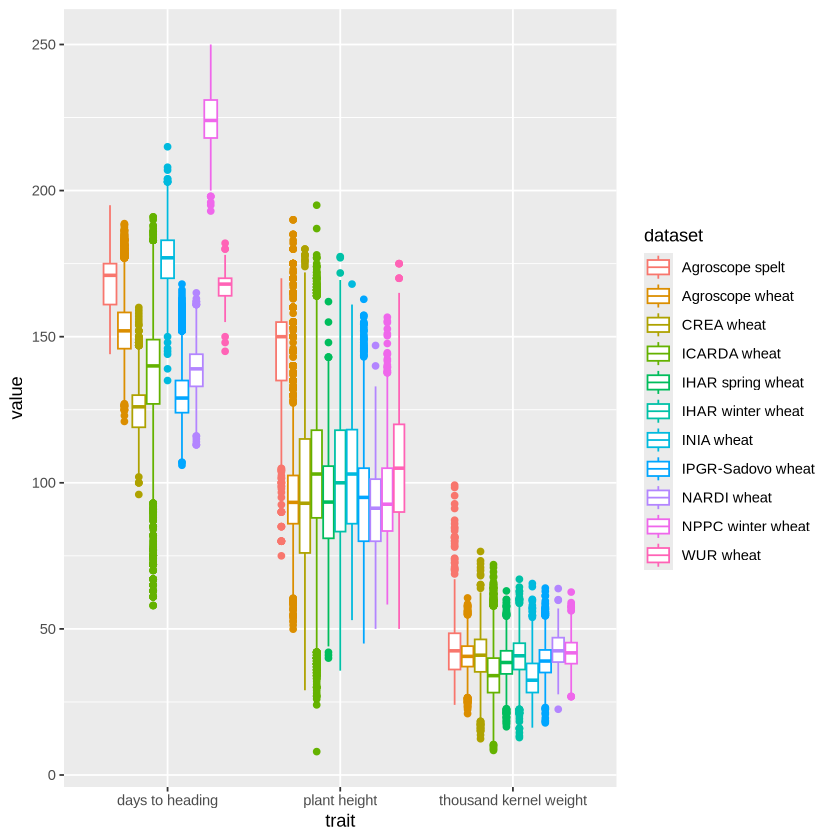

In [9]:
data_points_corrected |>
filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |>
mutate(across(c(dataset, trait), ~ str_replace_all(.x, "_", " "))) |>
ggplot(aes(trait, value, color=dataset)) + geom_boxplot()
ggsave("trait_values_distributions.svg")

## Counts of years accessions were tested

Saving 7 x 7 in image


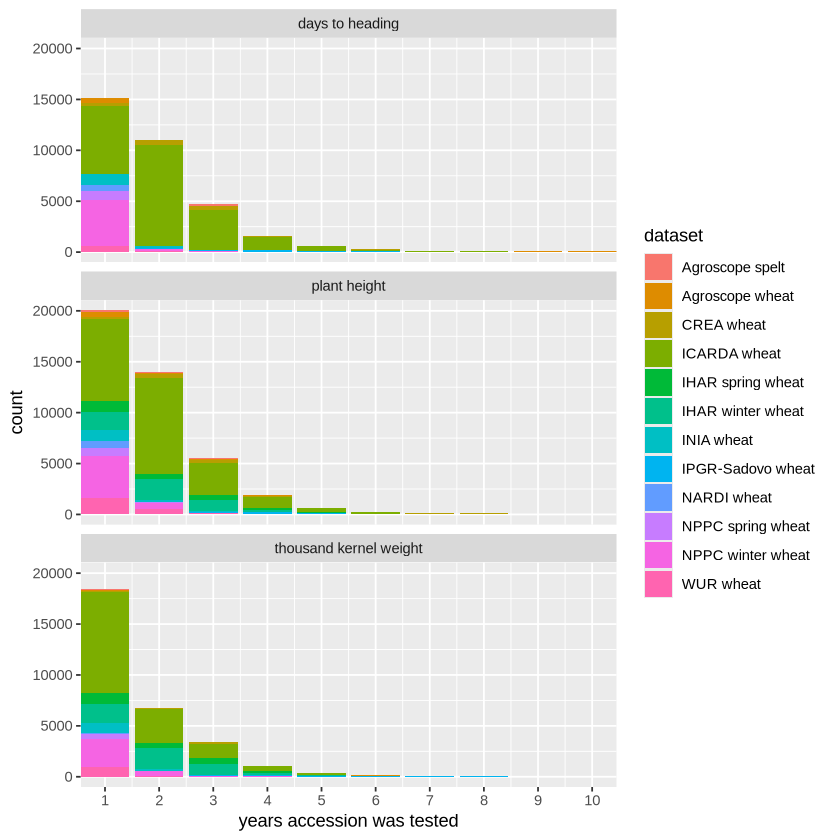

In [10]:
data_points |> filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |> 
distinct(dataset, campaign, accenumb, trait) |>
summarise(years_tested=n(), .by=c(dataset, accenumb, trait)) |>
mutate(across(c(dataset, trait), ~ str_replace_all(.x, "_", " "))) |>
ggplot(aes(years_tested, fill=dataset)) +
    geom_bar() +
    coord_cartesian(xlim=c(1, 10)) +
    scale_x_continuous("years accession was tested", labels = c(1:10), breaks = c(1:10)) +
    facet_wrap(~trait, dir="v")
ggsave("replication_years_counts.svg")

In [11]:
#all_rows |> select(dataset, campaign, accenumb, days_to_heading) |>
#drop_na() |>
#distinct(dataset, campaign, accenumb) |>
#summarise(years_tested=n(), .by=c(accenumb, dataset)) |>
#arrange(desc(years_tested)) |>
#ggplot(aes(years_tested, fill=dataset))+geom_bar()
#ggsave("HT_replication_years_counts.svg")

## Data quality

Saving 7 x 7 in image


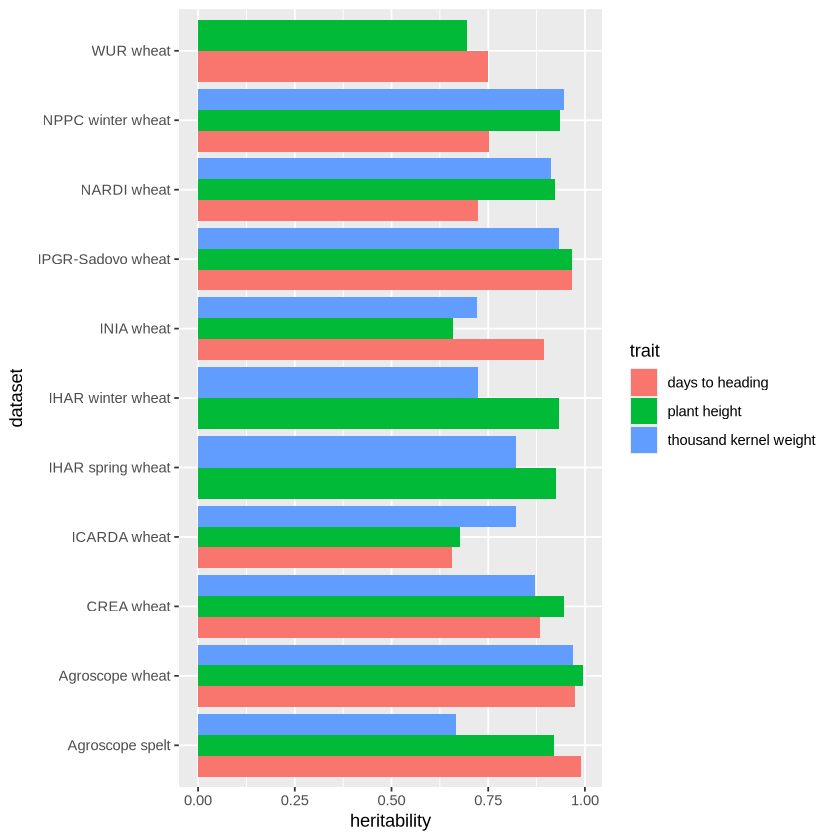

In [12]:
data_quality |>
filter(trait %in% c("days_to_heading", "plant_height", "thousand_kernel_weight")) |>
mutate(across(c(dataset, trait), ~ str_replace_all(.x, "_", " "))) |>
ggplot(aes(heritability, dataset, fill=trait)) + geom_col(position = "dodge")
ggsave("heritabilities.svg")

## BLUE pairwise plot matrix

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“Removed 34120 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 34316 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 38353 rows containing missing values”
Warning message:
“Removed 34316 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 20374 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 31916 rows containing missing values”
Warning message:
“Removed 38353 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 31916 rows containing missing values or values outside th

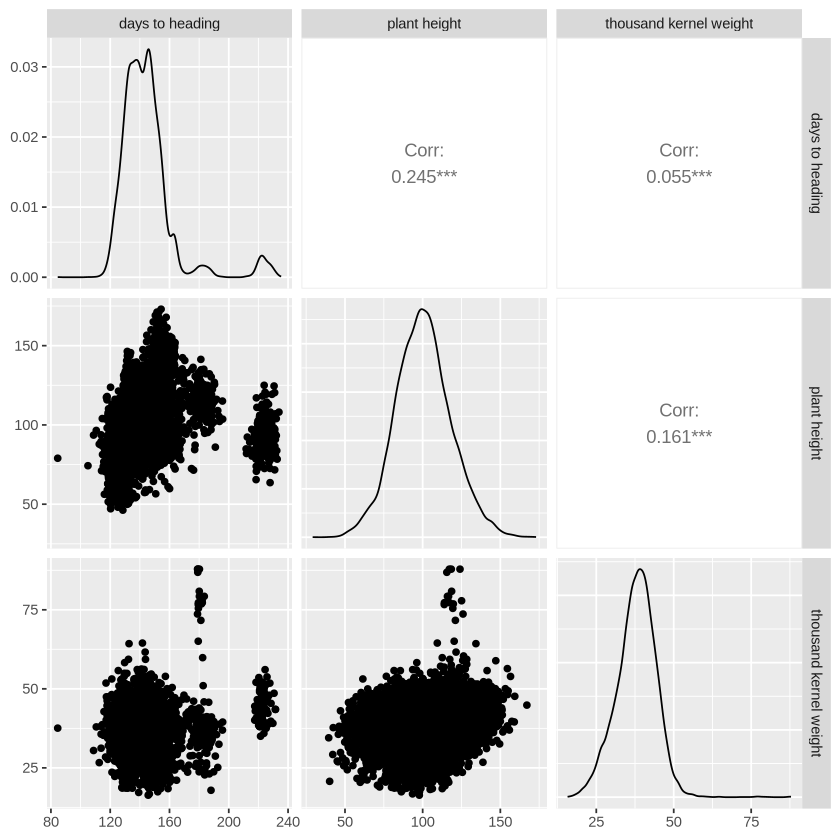

In [13]:
BLUE_values |> GGally::ggpairs(columns=c("days_to_heading_BLUE", "plant_height_BLUE", "thousand_kernel_weight_BLUE"),
                               columnLabels = c("days to heading", "plant height", "thousand kernel weight"))
ggsave("BLUE_pairwise_plot_matrix.svg")

## Triticum species counts

In [14]:
accessions_details |>
count(species, responsibility) |>
arrange(species, desc(n)) |>
gt::gt(groupname_col = "species", rowname_col = "responsibility", row_group_as_column = TRUE) |>
gt::cols_label(n="count") |>
gt::gtsave("triticum_species_counts.html")

## Map of of contributed accessions

Saving 7 x 7 in image


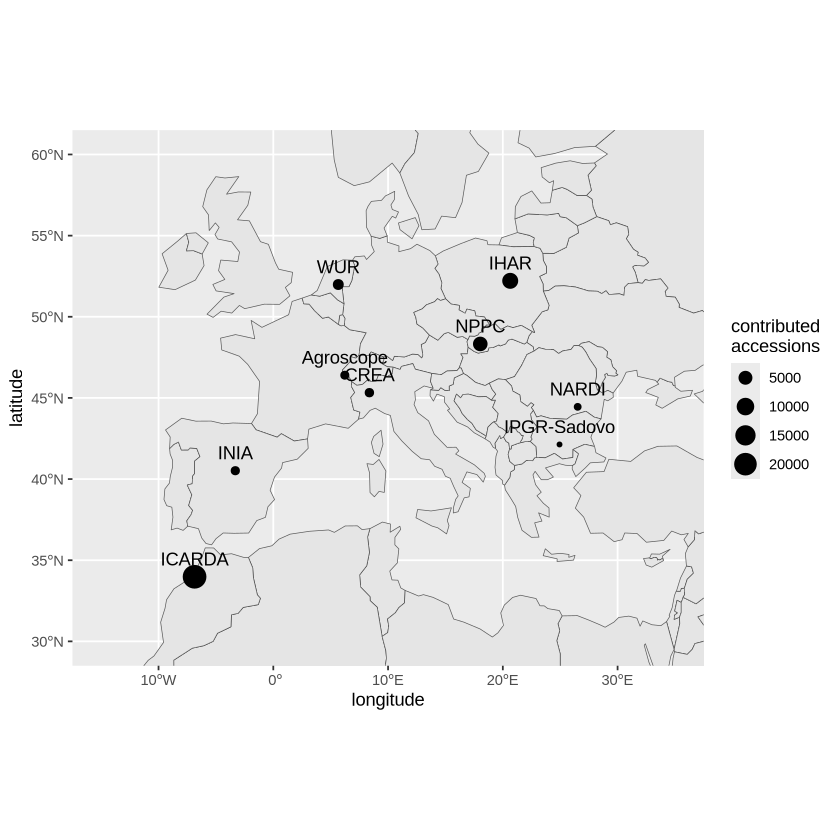

In [15]:
genebank_locations = tribble(
    ~genebank,      ~latitude,   ~longitude,
    "Agroscope",    46.399,      6.232,
    "CREA",         45.323,      8.373,
    "ICARDA",       33.980,      -6.860,
    "IHAR",         52.214,      20.644,
    "INIA",         40.515,      -3.311,
    "IPGR-Sadovo",  42.131,      24.940,
    "NARDI",        44.450,      26.522,
    "NPPC",         48.325,      18.035,
    "WUR",          51.986,      5.663,
)

accessions_counts <- BLUE_values |> 
    select(dataset) |> 
    mutate(genebank = str_split_i(dataset, "_", 1)) |>
    count(genebank, name="n_accessions") |> 
    left_join(genebank_locations, by="genebank")

base_sf <- rnaturalearth::ne_countries(continent = c("europe", "asia", "africa"), returnclass = "sf") |>
    select(name, geometry)

ggplot(accessions_counts) + geom_sf(data=base_sf) +
coord_sf(xlim = c(-15, 35), ylim = c(30, 60)) +
geom_point(aes(x = longitude, y = latitude, size = n_accessions)) +
geom_text(aes(x = longitude, y = latitude, label = genebank), nudge_y=1.1) +
labs(size = "contributed\naccessions")
ggsave("accessions_contributions_map.svg")

In [16]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/erwan/micromamba/envs/R/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4    
 [5] purrr_1.0.2     readr_2.1.5     tidyr_1.3.1     tibble_3.2.1   
 [9] ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] gtable_